# ProvedArea.py Demo
---


### Import Python Files

In [1]:
from ProvedArea import ProvedArea

### Instantiate a ProvedArea object with a single realization
To do this, we define the `single_realization` variable and set it equal to the `ProvedArea()` object, making sure to set the `realizations` parameter equal to 1 and supplying the necessary file paths for the well header and forecast parameter data.

Once the cell has ran, you can now call a variety of visualization methods on the object to explore the realization outputs. Note: you may need to run the cell more than once if the randomly chosen anchor points were non-representative. 

In [3]:
headers = 'ComboCurve Header Example.csv'
forecast_parameters = 'ComboCurve Forecast Parameter Example.csv'

single_realization = ProvedArea(1, headers, forecast_parameters)

Generating realizations...
Realization Number: 1

All realizations completed successfully.
Proved Radii Distance: 5.5125 miles


### Review realization outputs

Using the `plot_comparisons()` method we can view the results of our realization. The left chart shows the Average EUR/PLL of the various well groupings and is used to determine what radii level is considered proved. According to SPEE Monograph 3, the <i>proved</i> radii group is that which preceeds the radii group whose Average EUR/PLL dips below 90% of the analog well set's Average EUR/PLL. The chart on the right shows the corresponding well count for each of the well groupings. In this case, the proved radii group would be <b>r2</b> since r3 dips below the 90% threshold.

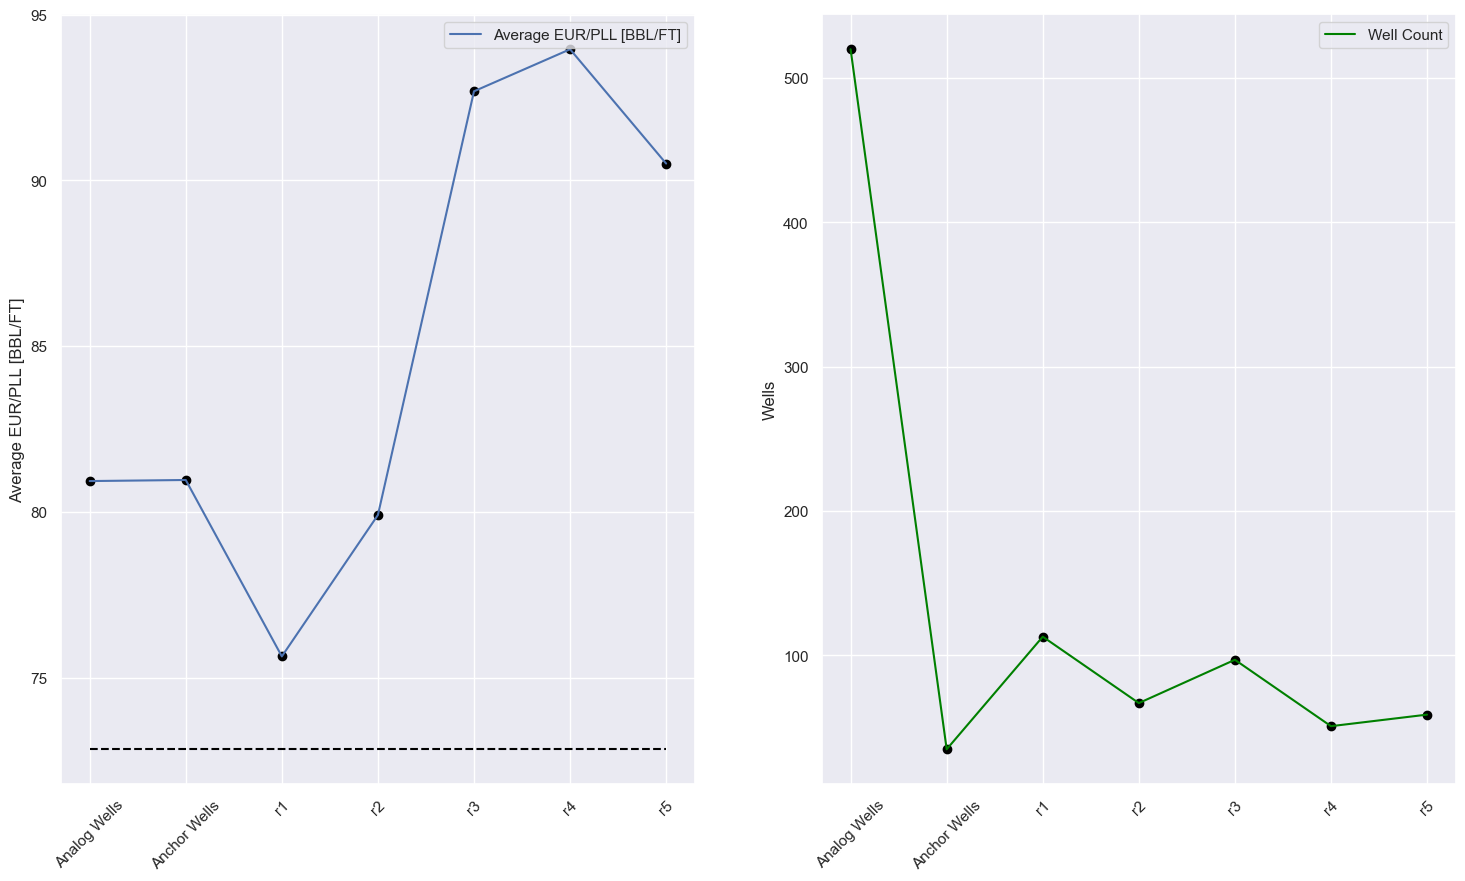

In [4]:
single_realization.plot_comparisons()

### Visualize Analog and Anchor Wells

Using the `plot_wells()` method we can quickly identify both the analog and anchor wells in addition to the wells that were encompassed by the expanding radii layers. As defined in the legned, the wells shown in black are the analog wells, while the anchor wells are the center points of the expanding grey concentric radii. The wells that lie within the concentric expanding radii are color-coded according to which layer they fall into. 

Note, currently, ProvedArea.py uses a well's surface hole coordinates to define its location.

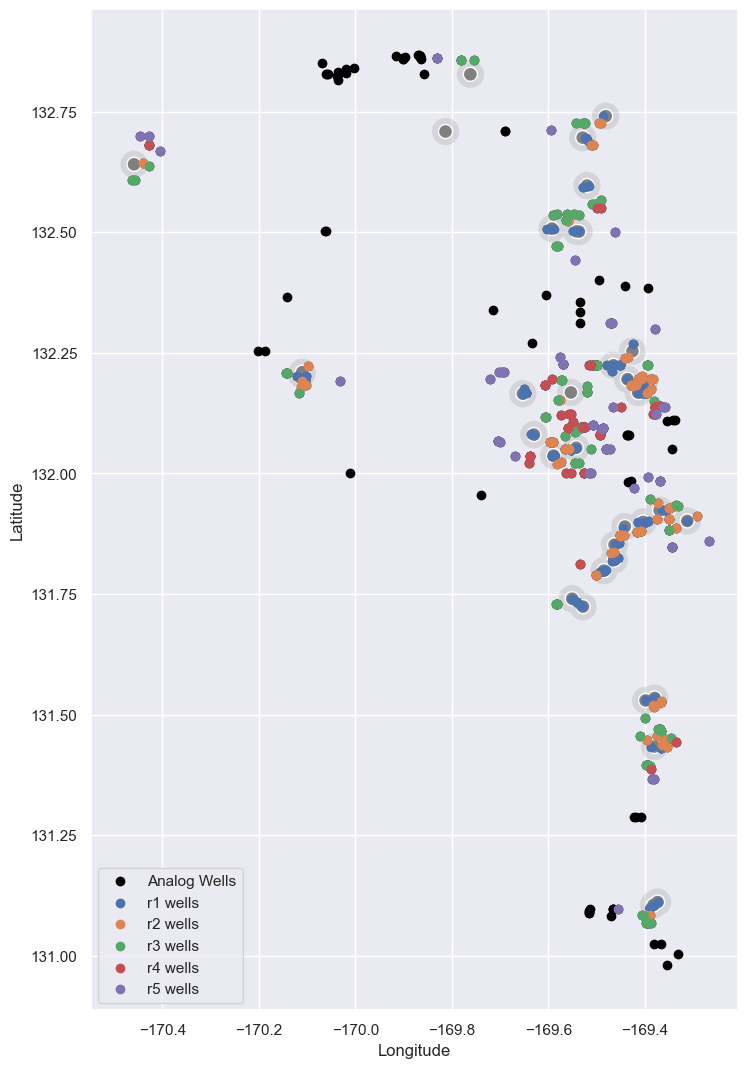

In [12]:
single_realization.plot_wells()

### Define the Proved Radii and Proved Area

Using the `plot_proved_areas()` method, we can visualize the proved radii bubbles along with the final proved area boundaries created by our alphashape. The proved area geometries represent the portions of the resource play that can be considered as "statistically proven." 

It is important to note here that due to the random nature of how the anchor points are selected, the proved area shown below is non-unique and is highly dependant upon which points are originally selected as our anchor set.

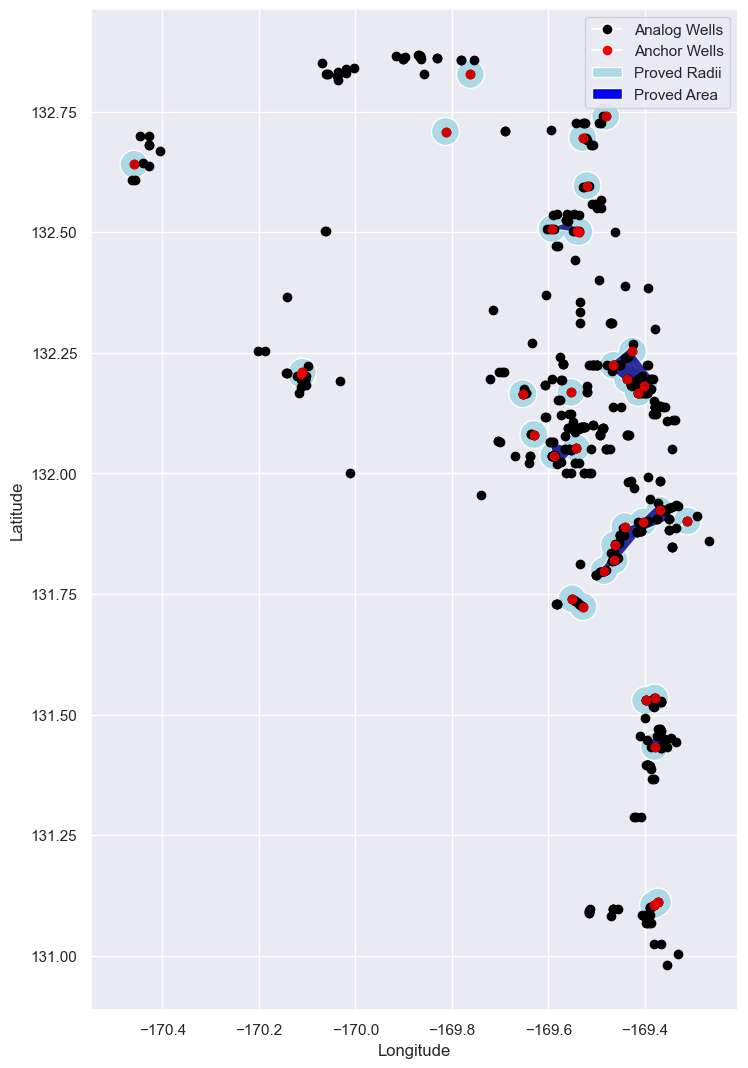

In [13]:
single_realization.plot_proved_areas()

### Instantiate a ProvedArea object with multiple realizations

Here, we once again instantiate a `ProvedArea` object, however, this time we set the `realizations` parameter equal to 500. Doing this allows us to generate a unique probabilistic solution to the proved area boundary using the aggregation of multiple realizations. Think Monte Carlo simulation. 

Currently, the program is not set-up to generate the realizations in parallel and will thus take a few minutes to complete depending on the processing power of your computer. 

Note, in the example given below, approximately 10% (50/500) realizations were not used as the selected anchor points were not representative of the analog well set distribution. 

In [12]:
multiple_realizations = ProvedArea(500, headers, forecast_parameters)

Generating realizations...
Realization Number: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 2

### Stack and aggregate realizations

With multiple realizations to play with, we can now use the `plot_aggregate_realization()` method to visualize the aggregated results. First, however, it's important to understand what this function is actually doing. 

Technically speaking, every realization generated is considerd statistically "proven" as defined by the SPEE Monograph 3 workflow. That being said, since the realizations vary highly with anchor well selection, some proven areas will be more optimistic and wide ranging, while others will be more conservative and smaller in domain. Therefore, in order to combat the variability in our outputs, we must perform a method of aggregation to ultimately yield some sort of reproducible answer. Although the proved area domain may vary largely from realization to realization, certain 'pieces' of the proved area may show up more often than others. This idea is essentially how the aggregation routine works. For all proved area realizations, imagine we took each ouput and stacked it vertically on top of one another. From there, we can count the number of overlapping 'pieces' between the various realization layers and make the assumption that pieces with higher overlaps can more confidently be considered part of the true proven area. In the chart shown below, you can see that the shape is broken up into various pieces with the lighter pieces representing sections of higher overlap and the darker pieces representing sections of lower overlap. 

In order to end up with a final 'proved' boundary or perimeter, we can choose a percentile by which we constrain our aggregated realization by the removal of pieces with low/no overlaps. Here, the smaller the percentile, the larger the number of required overlaps must be present for the piece to be included in the final output. Therefore, if you plotted the 99th percentile, you'd get a rather large final boundary whereas if you plotted the 10th percentile, you'd get a smaller boundary containing only the pieces that had a high amount of overlaps. I.e. the pieces for which we are most confident that they belong in the proved area of the resource play. 

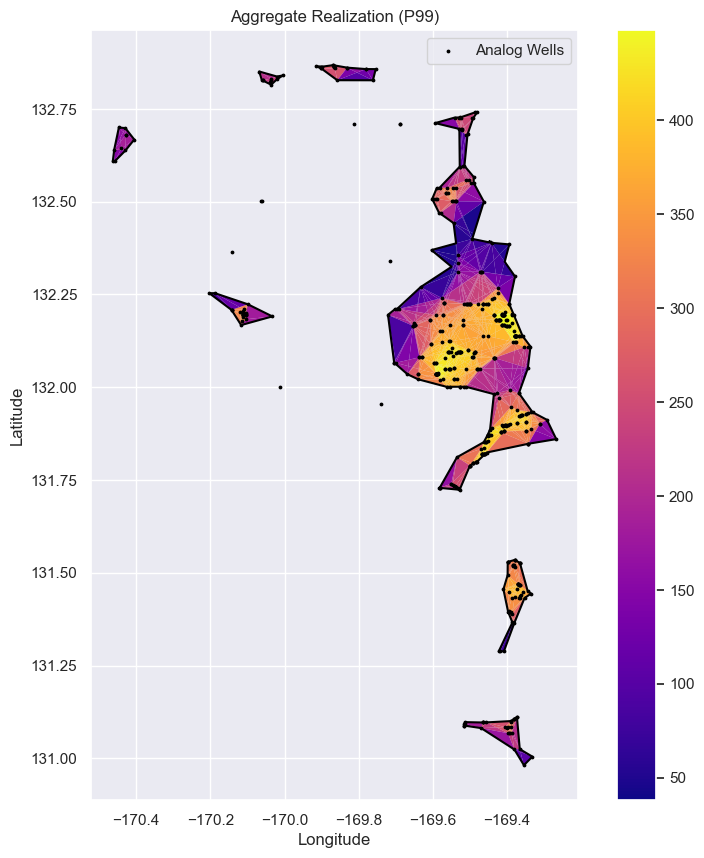

In [13]:
multiple_realizations.plot_aggregate_realization(0.99)

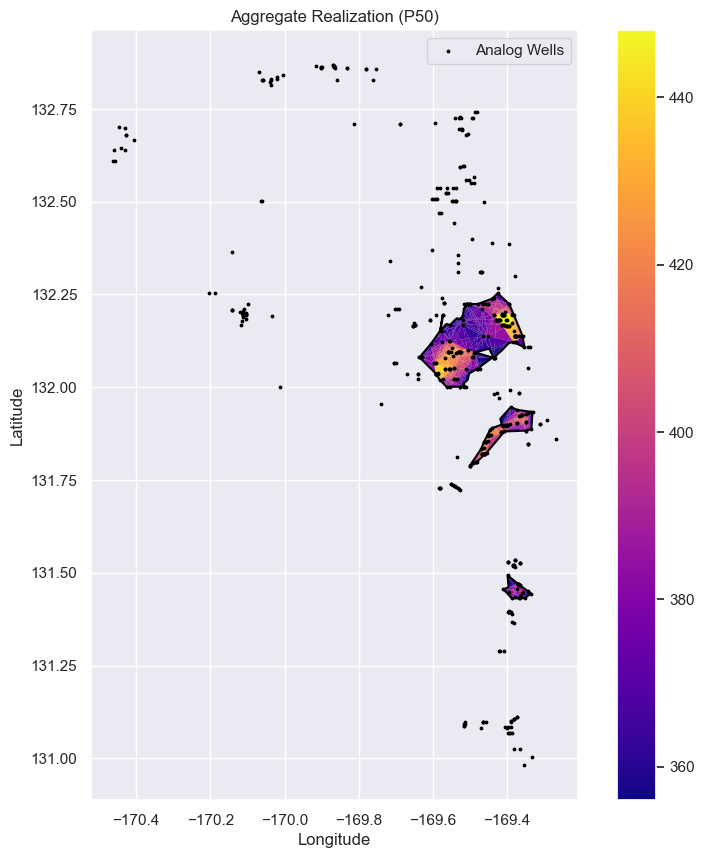

In [45]:
multiple_realizations.plot_aggregate_realization(0.5)

### Export results as a ShapeFile

In [ ]:
multiple_realizations.export_shapefiles(0.99)

# <b>ProvedArea.py</b>
Travis Salomaki, 2023<br>
ComboCurve, Inc.

## <b>Motivation</b>
The program below presents a Python implementation of SPEE Monograph 3's Expanding Concentric Radii method and introduces a new method of generating a unique probabilistic solution through the use of Monte Carlo sampling.

Since its initial release in 2010, the recommendations introduced by the Society of Petroleum Evaluation Engineer's (SPEE) Monograph 3 have been largely integrated into the key workflows and operating principles of modern exploration and production companies. In chapter three of the monograph, the authors present two methods of determining the statistically proved area of a resource play. For those unfamiliar with the terminology, a <b>resource play</b> can simply be thought of as a regional extent of hydrocarbons exhibiting "low risk and repeatable results," while the term <b>proved</b>, in the context of Oil and Gas reserve evaluations, refers to the "quantity of [hydrocarbons] that a company reasonably expects to extract from a given formation." Specifically, "proven reserves are classified as having a 90% or greater likelihood of being present and economically viable for extraction in current conditions."

The Expanding Concentric Radii Method offers a straightforward means of determining the statistically proved area of a resource play. At a high level, the process involves randomly selecting a group of "anchor" wells within a given population of "analog" wells, generating concentric circles around the anchor wells, and comparing the statistical characteristics of the wells that fall into the concentric circles against those of the analog population until you reach a radial distance in which the associated well charactertics are no longer representative of the analog population. 

At the time of Monograph 3's publication, implementing the Expanding Concentric Radii method in practice would have proven to be largely inconvenient and time consuming due to the limitations of GIS mapping platforms, produciton data access, and manually intensive DCA forecasts. Additionally, given that the anchor wells are randomly selected, the methodology results in a non-unique output that can vary widely from realization to realization. Given the advancements in computational efficiency, the advent of open-source geospatial Python libraries, and the wide-spread adoption of modern auto-forecasting platforms such as ComboCurve, ProvedArea.py provides operators, mineral shops, investment banks, and industry peers alike with a practical means of implementing the Expanding Concentric Radii Method and offers the added benefit of unique probabilistic outputs. 


## <b>Getting Started</b>

#### **Assumptions**
* The well set comprises of a single 'contiguous' drilling area.
* The target resource play is considered to be in the "statistical phase" of maturity. 

#### **Inputs**

All program inputs are taken directly from easily accesible ComboCurve exports. 
* ComboCurve Well Header Export (.csv)
* ComboCurve Forecast Parameter Export (.csv)

To access the Well Header Export, navigate to the Project Wells tab of your ComboCurve project and click the download icon located in the top right corner of the well header table. To access the Forecast Parameter Export, open a ComboCurve forecast set, click "Forecast Options," and then click "Export Forecast Parameters (CSV)."

#### **Requirements**
* All wells in the forecast set have a forecast generated for the oil phase and have a perforated lateral length (PLL) populated in the well header table. 
* All wells need both a surface latitude and a surface longitude field populated in the well header table. 


## <b>Dependencies</b>

The functions rely on the following packages:

1. <b>pandas</b>
1. <b>numpy</b>
1. <b>matplotlib</b>
1. <b>geopandas</b>
1. <b>shapely</b>
1. <b>alphashape</b>

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.

## References:
1. Guidelines for the Practical Evaluation of Undeveloped Reserves in Resource Plays. SPEE Society of Petroleum Evaluation Engineers, 2010. 
2. https://www.investopedia.com/terms/p/proven-reserves.asp

